<a href="https://colab.research.google.com/github/pragmatizt/DS-Unit-2-Regression-Classification/blob/master/IRA_E_203_assignment_regression_classification_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 3

## Assignment

We're going back to our other **New York City** real estate dataset. Instead of predicting apartment rents, you'll predict property sales prices.

But not just for condos in Tribeca...

Instead, predict property sales prices for **One Family Dwellings** (`BUILDING_CLASS_CATEGORY` == `'01 ONE FAMILY DWELLINGS'`) using a subset of the data where the **sale price was more than \\$100 thousand and less than $2 million.** 

The [NYC Department of Finance](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page) has a glossary of property sales terms and NYC Building Class Code Descriptions. The data comes from the [NYC OpenData](https://data.cityofnewyork.us/browse?q=NYC%20calendar%20sales) portal.


- [ ] Do train/test split. Use data from January — March 2019 to train. Use data from April 2019 to test.
- [ ] Do exploratory visualizations with Seaborn.
- [ ] Do one-hot encoding of categorical features.
- [ ] Do feature selection with `SelectKBest`.
- [ ] Fit a linear regression model with multiple features.
- [ ] Get mean absolute error for the test set.
- [ ] As always, commit your notebook to your fork of the GitHub repo.


## Stretch Goals
- [ ] Add your own stretch goal(s) !
- [ ] Try [`RidgeCV`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) instead of Linear Regression, especially if your errors blow up! Watch [Aaron Gallant's 9 minute video on Ridge Regression](https://www.youtube.com/watch?v=XK5jkedy17w) to learn more.
- [ ] Do [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Learn more about feature selection:
    - ["Permutation importance"](https://www.kaggle.com/dansbecker/permutation-importance)
    - [scikit-learn's User Guide for Feature Selection](https://scikit-learn.org/stable/modules/feature_selection.html)
    - [mlxtend](http://rasbt.github.io/mlxtend/) library
    - scikit-learn-contrib libraries: [boruta_py](https://github.com/scikit-learn-contrib/boruta_py) & [stability-selection](https://github.com/scikit-learn-contrib/stability-selection)
    - [_Feature Engineering and Selection_](http://www.feat.engineering/) by Kuhn & Johnson.
- [ ] Try [statsmodels](https://www.statsmodels.org/stable/index.html) if you’re interested in more inferential statistical approach to linear regression and feature selection, looking at p values and 95% confidence intervals for the coefficients.
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapters 1-3, for more math & theory, but in an accessible, readable way (without an excessive amount of formulas or academic pre-requisites).
(That book is good regardless of whether your cultural worldview is inferential statistics or predictive machine learning)
- [ ] Read Leo Breiman's paper, ["Statistical Modeling: The Two Cultures"](https://projecteuclid.org/download/pdf_1/euclid.ss/1009213726)
- [ ] Try [scikit-learn pipelines](https://scikit-learn.org/stable/modules/compose.html):

> Pipeline can be used to chain multiple estimators into one. This is useful as there is often a fixed sequence of steps in processing the data, for example feature selection, normalization and classification. Pipeline serves multiple purposes here:

> - **Convenience and encapsulation.** You only have to call fit and predict once on your data to fit a whole sequence of estimators.
> - **Joint parameter selection.** You can grid search over parameters of all estimators in the pipeline at once.
> - **Safety.** Pipelines help avoid leaking statistics from your test data into the trained model in cross-validation, by ensuring that the same samples are used to train the transformers and predictors.

In [1]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # category_encoders, version >= 2.0
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade category_encoders pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module3')

     |████████████████████████████████| 92kB 2.9MB/s 
     |████████████████████████████████| 133kB 8.5MB/s 
     |████████████████████████████████| 7.1MB 43.9MB/s 
     |████████████████████████████████| 614kB 43.8MB/s 
     |████████████████████████████████| 225kB 43.1MB/s 
     |████████████████████████████████| 768kB 39.4MB/s 
     |████████████████████████████████| 51kB 22.6MB/s 
     |████████████████████████████████| 194kB 40.9MB/s 
     |████████████████████████████████| 737kB 44.9MB/s 
     |████████████████████████████████| 51kB 22.5MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145035 sha256=a8a5fa3f65c396fc1982302c2781a00707767c7b44598f033c0359f3a9a06970
  Stored in directory: /root/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=19a99d919532fe906aa5a4e065efb9966dfb6ce964288babcc300a7536ad5ada
  Stored 

In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
import pandas as pd
import pandas_profiling

# Read New York City property sales data
df = pd.read_csv('../data/NYC_Citywide_Rolling_Calendar_Sales.csv')

# Change column names: replace spaces with underscores
df.columns = [col.replace(' ', '_') for col in df]

# SALE_PRICE was read as strings.
# Remove symbols, convert to integer
df['SALE_PRICE'] = (
    df['SALE_PRICE']
    .str.replace('$','')
    .str.replace('-','')
    .str.replace(',','')
    .astype(int)
)

## Exploring the data

In [4]:
print(df.shape)
df.head()

(23040, 21)


,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
0,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,2,716,1246,NaN,R4,"447 WEST 18TH STREET, PH12A",PH12A,10011.0,1.0,0.0,1.0,"10,733",1979.0,2007.0,2,R4,0,01/01/2019
1,1,FASHION,21 OFFICE BUILDINGS,4,812,68,NaN,O5,144 WEST 37TH STREET,NaN,10018.0,0.0,6.0,6.0,"2,962",15435.0,1920.0,4,O5,0,01/01/2019
2,1,FASHION,21 OFFICE BUILDINGS,4,839,69,NaN,O5,40 WEST 38TH STREET,NaN,10018.0,0.0,7.0,7.0,"2,074",11332.0,1930.0,4,O5,0,01/01/2019
3,1,GREENWICH VILLAGE-WEST,13 CONDOS - ELEVATOR APARTMENTS,2,592,1041,NaN,R4,"1 SHERIDAN SQUARE, 8C",8C,10014.0,1.0,0.0,1.0,0,500.0,0.0,2,R4,0,01/01/2019
4,1,UPPER EAST SIDE (59-79),15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,1379,1402,NaN,R1,"20 EAST 65TH STREET, B",B,10065.0,1.0,0.0,1.0,0,6406.0,0.0,2,R1,0,01/01/2019


In [5]:
df.describe()

,BOROUGH,BLOCK,LOT,EASE-MENT,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,SALE_PRICE
count,23040.000000,23040.000000,23040.000000,0.0,23039.000000,23039.000000,23039.000000,23039.000000,2.303900e+04,23005.000000,23040.000000,2.304000e+04
mean,2.978993,4459.116493,353.948481,NaN,10791.186987,1.827423,0.286514,2.320891,3.508555e+03,1819.671724,1.624479,1.328133e+06
std,1.258951,3713.269887,628.025255,NaN,1103.414210,10.090432,5.778224,12.070554,2.218610e+04,488.376571,0.803898,1.025394e+07
min,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,-148.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,2.000000,1341.000000,22.000000,NaN,10306.000000,0.000000,0.000000,1.000000,4.940000e+02,1920.000000,1.000000,0.000000e+00
50%,3.000000,3546.000000,49.000000,NaN,11211.000000,1.000000,0.000000,1.000000,1.356000e+03,1940.000000,1.000000,4.550000e+05
75%,4.000000,6673.750000,375.000000,NaN,11360.000000,2.000000,0.000000,2.000000,2.280000e+03,1965.000000,2.000000,8.750000e+05
max,5.000000,16350.000000,9057.000000,NaN,11697.000000,750.000000,570.000000,755.000000,1.303935e+06,2019.000000,4.000000,8.500000e+08


In [6]:
df.describe(exclude='number')

,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,LAND_SQUARE_FEET,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_DATE
count,23040,23040,23039,23039,23040,5201,22987,23040,23040
unique,252,44,10,146,22691,1724,3652,147,120
top,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,D4,100 JEROME STREET,4,0,D4,01/24/2019
freq,685,5061,11071,3408,6,99,7500,3408,480


In [7]:
df.info()
# Sale_Date is an object.  Let's change it to a datetime format.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23040 entries, 0 to 23039
Data columns (total 21 columns):
BOROUGH                           23040 non-null int64
NEIGHBORHOOD                      23040 non-null object
BUILDING_CLASS_CATEGORY           23040 non-null object
TAX_CLASS_AT_PRESENT              23039 non-null object
BLOCK                             23040 non-null int64
LOT                               23040 non-null int64
EASE-MENT                         0 non-null float64
BUILDING_CLASS_AT_PRESENT         23039 non-null object
ADDRESS                           23040 non-null object
APARTMENT_NUMBER                  5201 non-null object
ZIP_CODE                          23039 non-null float64
RESIDENTIAL_UNITS                 23039 non-null float64
COMMERCIAL_UNITS                  23039 non-null float64
TOTAL_UNITS                       23039 non-null float64
LAND_SQUARE_FEET                  22987 non-null object
GROSS_SQUARE_FEET                 23039 non-null float

## Train/Test Split

In [8]:
## BEFORE I DO THAT:
## extract single family household first.
## BUILDING_CLASS_CATEGORY == '01 ONE FAMILY DWELLINGS'

df['BUILDING_CLASS_CATEGORY'].value_counts()

01 ONE FAMILY DWELLINGS                       5061
02 TWO FAMILY DWELLINGS                       4567
10 COOPS - ELEVATOR APARTMENTS                3471
13 CONDOS - ELEVATOR APARTMENTS               3339
03 THREE FAMILY DWELLINGS                     1438
07 RENTALS - WALKUP APARTMENTS                 807
09 COOPS - WALKUP APARTMENTS                   672
15 CONDOS - 2-10 UNIT RESIDENTIAL              421
04 TAX CLASS 1 CONDOS                          418
44 CONDO PARKING                               366
17 CONDO COOPS                                 300
05 TAX CLASS 1 VACANT LAND                     288
22 STORE BUILDINGS                             288
12 CONDOS - WALKUP APARTMENTS                  256
14 RENTALS - 4-10 UNIT                         200
29 COMMERCIAL GARAGES                          147
08 RENTALS - ELEVATOR APARTMENTS               120
30 WAREHOUSES                                  105
21 OFFICE BUILDINGS                             96
31 COMMERCIAL VACANT LAND      

In [9]:
df['BUILDING_CLASS_CATEGORY']

0          13 CONDOS - ELEVATOR APARTMENTS
1                      21 OFFICE BUILDINGS
2                      21 OFFICE BUILDINGS
3          13 CONDOS - ELEVATOR APARTMENTS
4        15 CONDOS - 2-10 UNIT RESIDENTIAL
5           07 RENTALS - WALKUP APARTMENTS
6           07 RENTALS - WALKUP APARTMENTS
7                  01 ONE FAMILY DWELLINGS
8                  01 ONE FAMILY DWELLINGS
9                  01 ONE FAMILY DWELLINGS
10                 02 TWO FAMILY DWELLINGS
11              05 TAX CLASS 1 VACANT LAND
12                   29 COMMERCIAL GARAGES
13                   29 COMMERCIAL GARAGES
14                   29 COMMERCIAL GARAGES
15                   29 COMMERCIAL GARAGES
16                   29 COMMERCIAL GARAGES
17       32 HOSPITAL AND HEALTH FACILITIES
18               33 EDUCATIONAL FACILITIES
19        08 RENTALS - ELEVATOR APARTMENTS
20                     21 OFFICE BUILDINGS
21                   29 COMMERCIAL GARAGES
22               31 COMMERCIAL VACANT LAND
23       32

In [10]:
df['BUILDING_CLASS_CATEGORY'].nunique()

44

In [11]:
df['SALE_PRICE'].nunique()

3831

In [12]:
df['SALE_PRICE'].describe()

count    2.304000e+04
mean     1.328133e+06
std      1.025394e+07
min      0.000000e+00
25%      0.000000e+00
50%      4.550000e+05
75%      8.750000e+05
max      8.500000e+08
Name: SALE_PRICE, dtype: float64

In [0]:
parameters = df[((df['SALE_PRICE'] > 100000) & (df['SALE_PRICE'] < 2000000)) & (df['BUILDING_CLASS_CATEGORY'] == '01 ONE FAMILY DWELLINGS')]

In [0]:
df = parameters

In [15]:
df.shape

(3151, 21)

In [16]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
44,3,OCEAN PARKWAY-NORTH,01 ONE FAMILY DWELLINGS,1,5495,801,NaN,A9,4832 BAY PARKWAY,NaN,11230.0,1.0,0.0,1.0,"6,800",1325.0,1930.0,1,A9,550000,01/01/2019
61,4,QUEENS VILLAGE,01 ONE FAMILY DWELLINGS,1,7918,72,NaN,A1,80-23 232ND STREET,NaN,11427.0,1.0,0.0,1.0,"4,000",2001.0,1940.0,1,A1,200000,01/01/2019
78,2,PELHAM PARKWAY SOUTH,01 ONE FAMILY DWELLINGS,1,4210,19,NaN,A1,1260 RHINELANDER AVE,NaN,10461.0,1.0,0.0,1.0,"3,500",2043.0,1925.0,1,A1,810000,01/02/2019
108,3,FLATBUSH-CENTRAL,01 ONE FAMILY DWELLINGS,1,5212,69,NaN,A1,469 E 25TH ST,NaN,11226.0,1.0,0.0,1.0,"4,000",2680.0,1899.0,1,A1,125000,01/02/2019
111,3,FLATBUSH-EAST,01 ONE FAMILY DWELLINGS,1,7930,121,NaN,A5,5521 WHITTY LANE,NaN,11203.0,1.0,0.0,1.0,"1,710",1872.0,1940.0,1,A5,620000,01/02/2019


In [17]:
# Not sure if this is a necessary step -- but converting to datetime format.
df['SALE_DATE'] = pd.to_datetime(df['SALE_DATE'], infer_datetime_format=True)
df['SALE_DATE'].describe()

count                    3151
unique                     91
top       2019-01-31 00:00:00
freq                       78
first     2019-01-01 00:00:00
last      2019-04-30 00:00:00
Name: SALE_DATE, dtype: object

In [18]:
# Do a counts
df['SALE_DATE'].dt.month.value_counts()

1    947
3    799
2    761
4    644
Name: SALE_DATE, dtype: int64

In [19]:
## Create train and test dataframes
#train = df[df.sale_date.dt.month < 4]
#test = df[df.sale_date.dt.month == 4]

df = df.set_index('SALE_DATE')
train = df[:'2019-03'].reset_index()
test = df['2019-04':].reset_index()
df = df.reset_index()

train.shape, test.shape

((2507, 21), (644, 21))

## Visualizations

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
print(df.shape)
df.head()

(3151, 21)


,SALE_DATE,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE
0,2019-01-01,3,OCEAN PARKWAY-NORTH,01 ONE FAMILY DWELLINGS,1,5495,801,NaN,A9,4832 BAY PARKWAY,NaN,11230.0,1.0,0.0,1.0,"6,800",1325.0,1930.0,1,A9,550000
1,2019-01-01,4,QUEENS VILLAGE,01 ONE FAMILY DWELLINGS,1,7918,72,NaN,A1,80-23 232ND STREET,NaN,11427.0,1.0,0.0,1.0,"4,000",2001.0,1940.0,1,A1,200000
2,2019-01-02,2,PELHAM PARKWAY SOUTH,01 ONE FAMILY DWELLINGS,1,4210,19,NaN,A1,1260 RHINELANDER AVE,NaN,10461.0,1.0,0.0,1.0,"3,500",2043.0,1925.0,1,A1,810000
3,2019-01-02,3,FLATBUSH-CENTRAL,01 ONE FAMILY DWELLINGS,1,5212,69,NaN,A1,469 E 25TH ST,NaN,11226.0,1.0,0.0,1.0,"4,000",2680.0,1899.0,1,A1,125000
4,2019-01-02,3,FLATBUSH-EAST,01 ONE FAMILY DWELLINGS,1,7930,121,NaN,A5,5521 WHITTY LANE,NaN,11203.0,1.0,0.0,1.0,"1,710",1872.0,1940.0,1,A5,620000


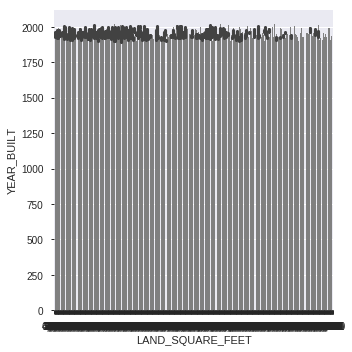

In [22]:
sns.catplot(x='LAND_SQUARE_FEET', y='YEAR_BUILT', data=train , kind='bar', color='grey');

In [23]:
df.isnull().sum()

SALE_DATE                            0
BOROUGH                              0
NEIGHBORHOOD                         0
BUILDING_CLASS_CATEGORY              0
TAX_CLASS_AT_PRESENT                 0
BLOCK                                0
LOT                                  0
EASE-MENT                         3151
BUILDING_CLASS_AT_PRESENT            0
ADDRESS                              0
APARTMENT_NUMBER                  3150
ZIP_CODE                             0
RESIDENTIAL_UNITS                    0
COMMERCIAL_UNITS                     0
TOTAL_UNITS                          0
LAND_SQUARE_FEET                     0
GROSS_SQUARE_FEET                    0
YEAR_BUILT                           0
TAX_CLASS_AT_TIME_OF_SALE            0
BUILDING_CLASS_AT_TIME_OF_SALE       0
SALE_PRICE                           0
dtype: int64

In [24]:
train.isnull().sum()

# we have null values in ease-ment and apartment_number

SALE_DATE                            0
BOROUGH                              0
NEIGHBORHOOD                         0
BUILDING_CLASS_CATEGORY              0
TAX_CLASS_AT_PRESENT                 0
BLOCK                                0
LOT                                  0
EASE-MENT                         2507
BUILDING_CLASS_AT_PRESENT            0
ADDRESS                              0
APARTMENT_NUMBER                  2506
ZIP_CODE                             0
RESIDENTIAL_UNITS                    0
COMMERCIAL_UNITS                     0
TOTAL_UNITS                          0
LAND_SQUARE_FEET                     0
GROSS_SQUARE_FEET                    0
YEAR_BUILT                           0
TAX_CLASS_AT_TIME_OF_SALE            0
BUILDING_CLASS_AT_TIME_OF_SALE       0
SALE_PRICE                           0
dtype: int64

In [25]:
list(df.columns)

['SALE_DATE',
 'BOROUGH',
 'NEIGHBORHOOD',
 'BUILDING_CLASS_CATEGORY',
 'TAX_CLASS_AT_PRESENT',
 'BLOCK',
 'LOT',
 'EASE-MENT',
 'BUILDING_CLASS_AT_PRESENT',
 'ADDRESS',
 'APARTMENT_NUMBER',
 'ZIP_CODE',
 'RESIDENTIAL_UNITS',
 'COMMERCIAL_UNITS',
 'TOTAL_UNITS',
 'LAND_SQUARE_FEET',
 'GROSS_SQUARE_FEET',
 'YEAR_BUILT',
 'TAX_CLASS_AT_TIME_OF_SALE',
 'BUILDING_CLASS_AT_TIME_OF_SALE',
 'SALE_PRICE']

In [0]:
## We saw that there were a lot of null values on apartment numbers & 
## Easement.  So we created a new variable without those column headers.

column_headers = ['SALE_DATE',
 'BOROUGH',
 'NEIGHBORHOOD',
 'TAX_CLASS_AT_PRESENT',
 'BLOCK',
 'LOT',
 'BUILDING_CLASS_AT_PRESENT',
 'ADDRESS',
 'ZIP_CODE',
 'RESIDENTIAL_UNITS',
 'COMMERCIAL_UNITS',
 'TOTAL_UNITS',
 'LAND_SQUARE_FEET',
 'GROSS_SQUARE_FEET',
 'YEAR_BUILT',
 'BUILDING_CLASS_AT_TIME_OF_SALE']

BOROUGH


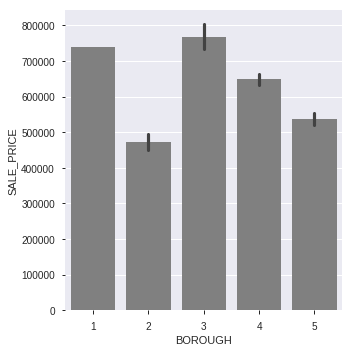

BUILDING_CLASS_AT_PRESENT


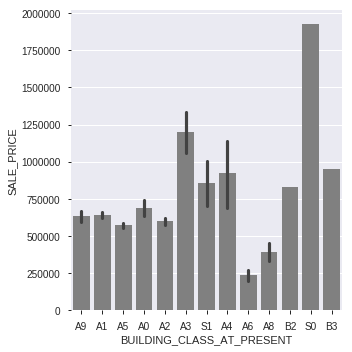

BUILDING_CLASS_AT_TIME_OF_SALE


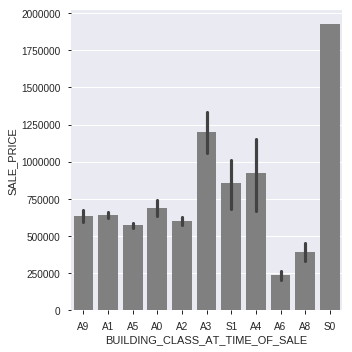

COMMERCIAL_UNITS


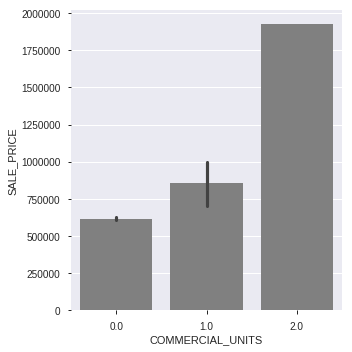

RESIDENTIAL_UNITS


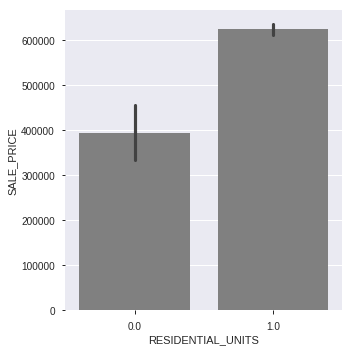

TAX_CLASS_AT_PRESENT


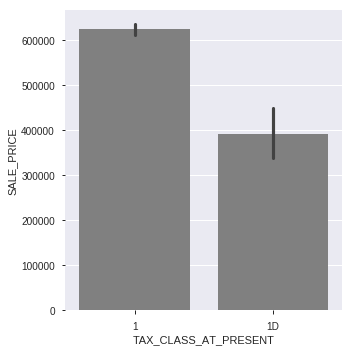

TOTAL_UNITS


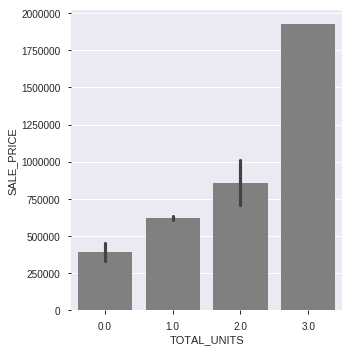

In [27]:
for col in sorted(column_headers):
  # Check how many unique values the column has first...
  if train[col].nunique() <= 20:
    print(col)
    sns.catplot(x=col, y='SALE_PRICE', data=train, kind='bar', color='grey')
    ## notice where we did x=col
    plt.show()

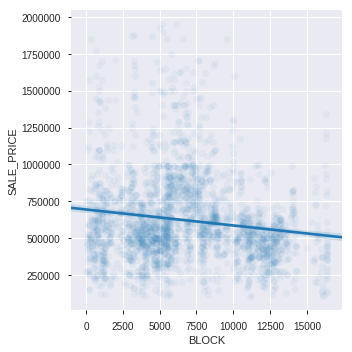

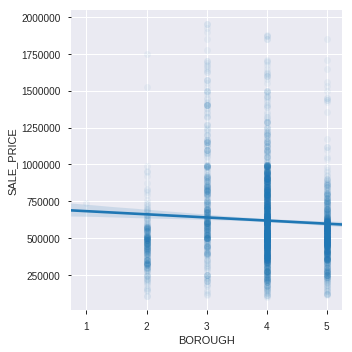

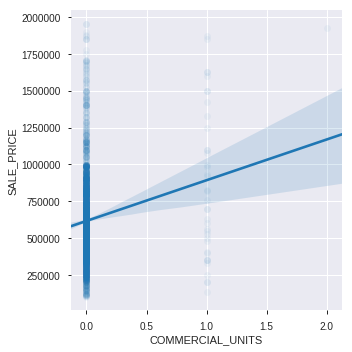

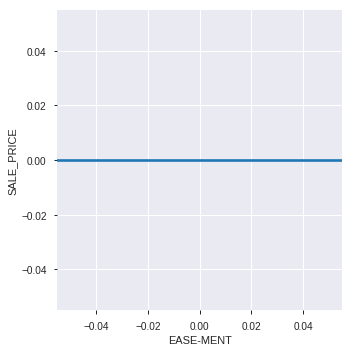

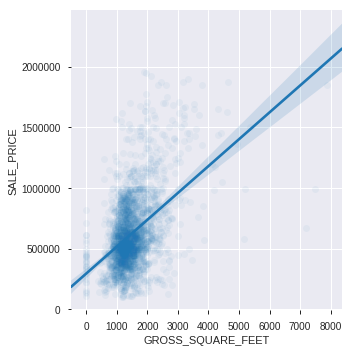

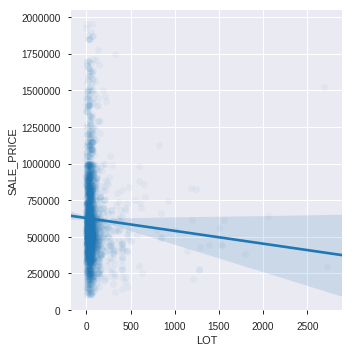

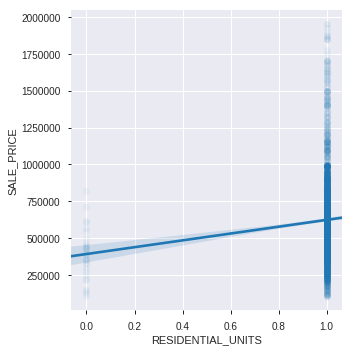

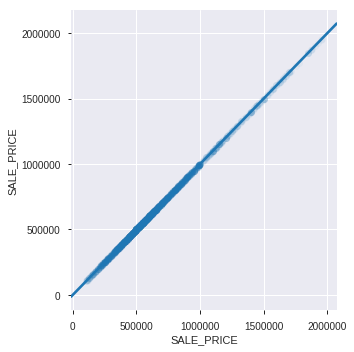

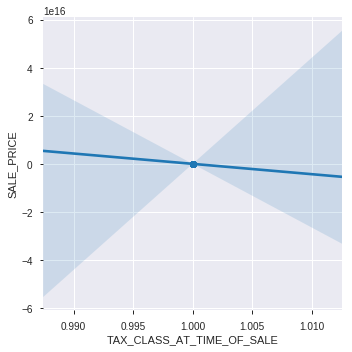

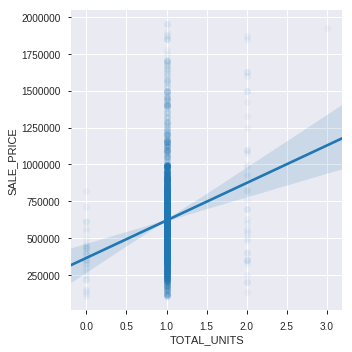

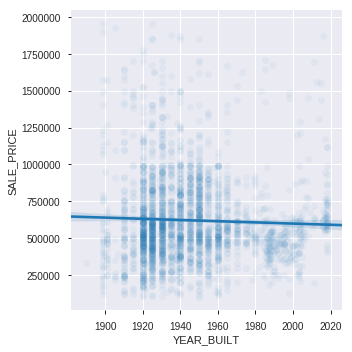

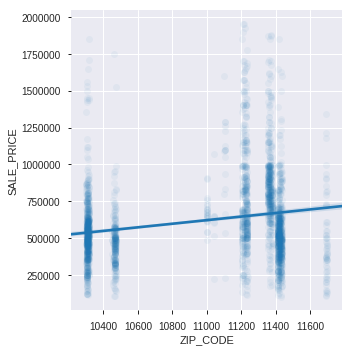

In [28]:
numeric = train.select_dtypes('number')
for col in sorted(numeric.columns):
    sns.lmplot(x=col, y='SALE_PRICE', data=train, scatter_kws=dict(alpha=0.05))
    plt.show()

# DO FEATURE SELECTION

## Subsetting

In [29]:
train_subset = train.select_dtypes('number').dropna(axis='columns')
test_subset = test.select_dtypes('number').dropna(axis='columns')

train_subset.columns

Index(['BOROUGH', 'BLOCK', 'LOT', 'ZIP_CODE', 'RESIDENTIAL_UNITS',
       'COMMERCIAL_UNITS', 'TOTAL_UNITS', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'SALE_PRICE'],
      dtype='object')

In [30]:
test_subset.columns

Index(['BOROUGH', 'BLOCK', 'LOT', 'ZIP_CODE', 'RESIDENTIAL_UNITS',
       'COMMERCIAL_UNITS', 'TOTAL_UNITS', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'SALE_PRICE'],
      dtype='object')

In [31]:
train_subset.columns == test_subset.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [0]:
assert all(train_subset.columns == test_subset.columns)

In [33]:
target = 'SALE_PRICE'
features = train_subset.columns.drop(target)
X_train = train_subset[features]
y_train = train_subset[target]
X_test = test_subset[features]
y_test = test_subset[target]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2507, 10), (2507,), (644, 10), (644,))

## Univariate, Forward Selection

In [34]:
from sklearn.feature_selection import f_regression, SelectKBest

selector = SelectKBest(score_func=f_regression, k=5)

X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

X_train_selected.shape, X_test_selected.shape

  

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


((2507, 5), (644, 5))

In [35]:
# Which features were selected?
all_names = X_train.columns
selected_mask = selector.get_support()
selected_names = all_names[selected_mask]
unselected_names = all_names[~selected_mask]

print('Features selected:')
for name in selected_names:
    print(name)
    
print('\nFeatures not selected:')
for name in unselected_names:
    print(name)

Features selected:
BLOCK
ZIP_CODE
COMMERCIAL_UNITS
TOTAL_UNITS
GROSS_SQUARE_FEET

Features not selected:
BOROUGH
LOT
RESIDENTIAL_UNITS
YEAR_BUILT
TAX_CLASS_AT_TIME_OF_SALE


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

model = LinearRegression()
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)
mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: ${mae:,.0f}')

Test MAE: $167,908


In [37]:
for k in range(1, len(X_train.columns)+1):
    
    print(f'{k} features')
    
    selector = SelectKBest(score_func=f_regression, k=k)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Test MAE: ${mae:,.0f} \n')

1 features
Test MAE: $183,641 

2 features
Test MAE: $184,003 

3 features
Test MAE: $183,943 

4 features
Test MAE: $167,050 

5 features
Test MAE: $167,908 

6 features
Test MAE: $167,908 

7 features
Test MAE: $168,140 

8 features
Test MAE: $168,137 

9 features
Test MAE: $167,806 

10 features
Test MAE: $167,806 



/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: divide by zero encountered in

## One-hot encoding of Categorical

In [38]:
train.describe(exclude='number')

,SALE_DATE,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,LAND_SQUARE_FEET,BUILDING_CLASS_AT_TIME_OF_SALE
count,2507,2507,2507,2507,2507,2507,1,2507,2507
unique,68,176,1,2,13,2497,1,887,11
top,2019-01-31 00:00:00,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,A1,118-20 202ND STREET,RP.,"4,000",A1
freq,78,77,2507,2476,919,2,1,234,919
first,2019-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2019-03-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
train.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq,first,last
BUILDING_CLASS_CATEGORY,2507,1,01 ONE FAMILY DWELLINGS,2507,NaN,NaN
APARTMENT_NUMBER,1,1,RP.,1,NaN,NaN
TAX_CLASS_AT_PRESENT,2507,2,1,2476,NaN,NaN
BUILDING_CLASS_AT_TIME_OF_SALE,2507,11,A1,919,NaN,NaN
BUILDING_CLASS_AT_PRESENT,2507,13,A1,919,NaN,NaN
SALE_DATE,2507,68,2019-01-31 00:00:00,78,2019-01-01 00:00:00,2019-03-30 00:00:00
NEIGHBORHOOD,2507,176,FLUSHING-NORTH,77,NaN,NaN
LAND_SQUARE_FEET,2507,887,"4,000",234,NaN,NaN
ADDRESS,2507,2497,118-20 202ND STREET,2,NaN,NaN


In [40]:
categorical = train.describe(exclude='number').T.sort_values(by='unique')
categorical

,count,unique,top,freq,first,last
BUILDING_CLASS_CATEGORY,2507,1,01 ONE FAMILY DWELLINGS,2507,NaN,NaN
APARTMENT_NUMBER,1,1,RP.,1,NaN,NaN
TAX_CLASS_AT_PRESENT,2507,2,1,2476,NaN,NaN
BUILDING_CLASS_AT_TIME_OF_SALE,2507,11,A1,919,NaN,NaN
BUILDING_CLASS_AT_PRESENT,2507,13,A1,919,NaN,NaN
SALE_DATE,2507,68,2019-01-31 00:00:00,78,2019-01-01 00:00:00,2019-03-30 00:00:00
NEIGHBORHOOD,2507,176,FLUSHING-NORTH,77,NaN,NaN
LAND_SQUARE_FEET,2507,887,"4,000",234,NaN,NaN
ADDRESS,2507,2497,118-20 202ND STREET,2,NaN,NaN


In [41]:
## Explore TAX_CLASS_AT_PRESENT
train['TAX_CLASS_AT_PRESENT'].head()

0    1
1    1
2    1
3    1
4    1
Name: TAX_CLASS_AT_PRESENT, dtype: object

In [42]:
train['TAX_CLASS_AT_PRESENT'].value_counts(normalize=True)

1     0.987635
1D    0.012365
Name: TAX_CLASS_AT_PRESENT, dtype: float64

In [43]:
train.groupby('TAX_CLASS_AT_PRESENT')['SALE_PRICE'].mean()

TAX_CLASS_AT_PRESENT
1     624436.781906
1D    392900.000000
Name: SALE_PRICE, dtype: float64

In [44]:
import category_encoders as ce
encoder = ce.OneHotEncoder(use_cat_names=True)
encoded = encoder.fit_transform(train['TAX_CLASS_AT_PRESENT'])
encoded.head()

,TAX_CLASS_AT_PRESENT_1,TAX_CLASS_AT_PRESENT_1D
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [0]:
## Find columns with high cardinality
## High-cardinality refers to columns with values that are very 
## uncommon or unique. High-cardinality column values are typically 
## identification numbers, email addresses, or user names. 
## An example of a data table column with high-cardinality would be a 
## USERS table with a column named USER_ID.

In [0]:
# BOROUGH is a numeric column, but arguably should be a categorical feature,
# so convert it from a number to a string
train['BOROUGH'] = train['BOROUGH'].astype(str)

# Reduce cardinality for NEIGHBORHOOD feature

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10, 
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'

In [60]:
train['BOROUGH'].dtypes

dtype('O')

In [62]:
encoded_borough = encoder.fit_transform(train['BOROUGH'])
encoded_borough.head()

KeyError: ignored

In [0]:
test['BOROUGH'] = test['BOROUGH'].astype(str)


In [0]:
# Giving me a KeyError: 'Building class at present'; on a borough variable?

train['BUILDING_CLASS_AT_PRESENT'].nunique()

In [48]:
top10

Index(['FLUSHING-NORTH', 'GREAT KILLS', 'SPRINGFIELD GARDENS', 'ST. ALBANS',
       'SO. JAMAICA-BAISLEY PARK', 'QUEENS VILLAGE', 'SOUTH OZONE PARK',
       'BAYSIDE', 'LAURELTON', 'MIDLAND BEACH'],
      dtype='object')

In [49]:
top10.value_counts()

GREAT KILLS                 1
MIDLAND BEACH               1
FLUSHING-NORTH              1
BAYSIDE                     1
QUEENS VILLAGE              1
SOUTH OZONE PARK            1
ST. ALBANS                  1
SO. JAMAICA-BAISLEY PARK    1
SPRINGFIELD GARDENS         1
LAURELTON                   1
dtype: int64

In [50]:
### DO A UNIQUE VALUE COUNTS ON: ZIP CODE AND YEAR
print(train['ZIP_CODE'].nunique())
print(train['YEAR_BUILT'].nunique())
print(train['BUILDING_CLASS_AT_PRESENT'].nunique())

122
86
13


In [51]:
train['BUILDING_CLASS_AT_PRESENT'].dtype

dtype('O')

In [52]:
type(train['BUILDING_CLASS_AT_PRESENT'])

pandas.core.series.Series

In [53]:
train['BUILDING_CLASS_AT_PRESENT'].values

array(['A9', 'A1', 'A1', ..., 'A1', 'A2', 'A0'], dtype=object)

## Univariate, Forward Selection

In [54]:
# Select the 15 features that best correlate with the target
from sklearn.feature_selection import f_regression, SelectKBest

# Similar API to what we've seen before
selector = SelectKBest(score_func=f_regression, k=10)

# IMPORTANT!
# .fit_transform on the train set
# .transform on test set
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
X_train_selected.shape, X_test_selected.shape

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


((2507, 10), (644, 10))

In [0]:
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [56]:
target = 'SALE_PRICE'
high_cardinality = ['BUILDING_CLASS_CATEGORY', 'TAX_CLASS_AT_PRESENT', 
                    'BUILDING_CLASS_AT_TIME_OF_SALE', 'SALE_DATE', 
                    'NEIGHBORHOOD', 'LAND_SQUARE_FEET', 'ADDRESS']

features = train.columns.drop([target, 'EASE-MENT'] + high_cardinality) # <--- what does this mean?

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

# Encode it
encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Scale it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

for k in range(1, len(X_train_encoded.columns)+1):
  print(f'{k} features')
  
  selector = SelectKBest(score_func=f_regression, k=k)
  X_train_selected = selector.fit_transform(X_train_scaled, y_train)
  X_test_selected = selector.transform(X_test_scaled)
  
  model = LinearRegression()
  model.fit(X_train_selected, y_train)
  
  y_pred = model.predict(X_test_selected)
  mae = mean_absolute_error(y_test, y_pred)
  print(f'Test MAE: ${mae:,.0f} \n')

1 features
Test MAE: $183,641 

2 features
Test MAE: $182,569 

3 features
Test MAE: $183,441 

4 features
Test MAE: $181,935 

5 features
Test MAE: $182,446 

6 features
Test MAE: $175,517 

7 features
Test MAE: $175,133 

8 features
Test MAE: $164,627 

9 features
Test MAE: $165,786 

10 features
Test MAE: $164,889 

11 features
Test MAE: $164,789 

12 features
Test MAE: $164,543 

13 features
Test MAE: $164,607 

14 features
Test MAE: $165,202 

15 features
Test MAE: $56,091,469,021,627,440 

16 features
Test MAE: $17,947,702,980,661,718 

17 features
Test MAE: $66,389,157,096,665,848 

18 features
Test MAE: $14,034,969,291,254,826 

19 features
Test MAE: $50,956,008,431,933,464 

20 features
Test MAE: $16,099,075,578,543,154 

21 features
Test MAE: $16,698,489,340,470,440 

22 features
Test MAE: $10,686,790,794,618,874 

23 features
Test MAE: $9,236,754,865,924,048 

24 features
Test MAE: $30,092,873,808,654,684 

25 features
Test MAE: $26,875,819,936,611,356 

26 features
Test MAE

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/p

In [57]:
# Getting an error due to null values.
categorical.isnull().sum()

count     0
unique    0
top       0
freq      0
first     8
last      8
dtype: int64

In [58]:
categorical.head()

,count,unique,top,freq,first,last
BUILDING_CLASS_CATEGORY,2507,1,01 ONE FAMILY DWELLINGS,2507,NaN,NaN
APARTMENT_NUMBER,1,1,RP.,1,NaN,NaN
TAX_CLASS_AT_PRESENT,2507,2,1,2476,NaN,NaN
BUILDING_CLASS_AT_TIME_OF_SALE,2507,11,A1,919,NaN,NaN
BUILDING_CLASS_AT_PRESENT,2507,13,A1,919,NaN,NaN
